Applying rules:
	adjacent: gender = False
	adjacent: language = False
	adjacent: game = False
Target fitness set to 100.0%


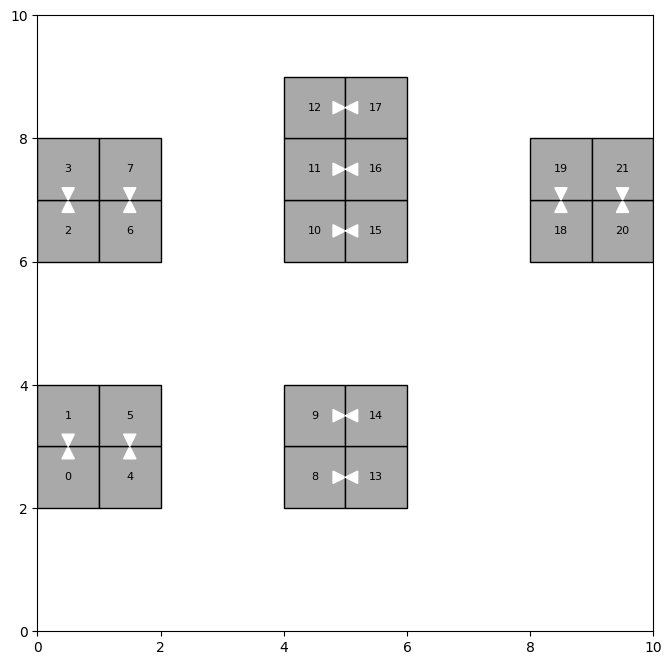

Random initial assignment


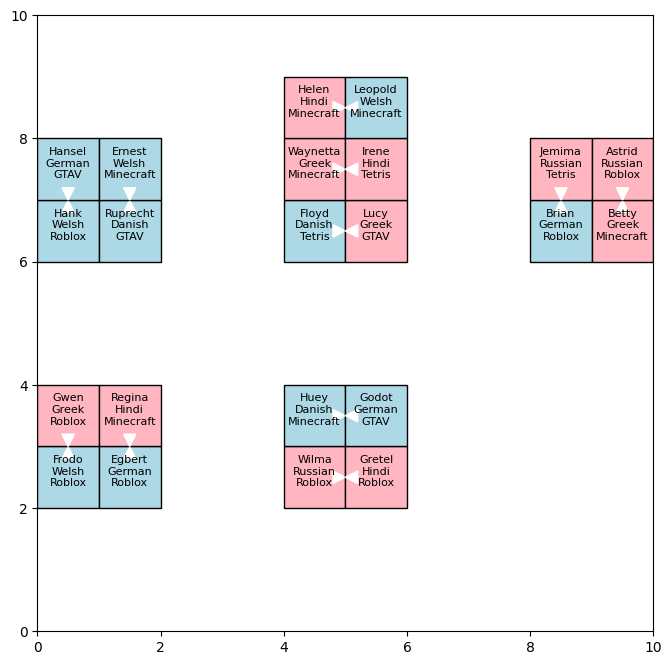


SUCCESS, 100.0% after 109706 iterations, in 5.6 seconds. Throughput: 19602.77


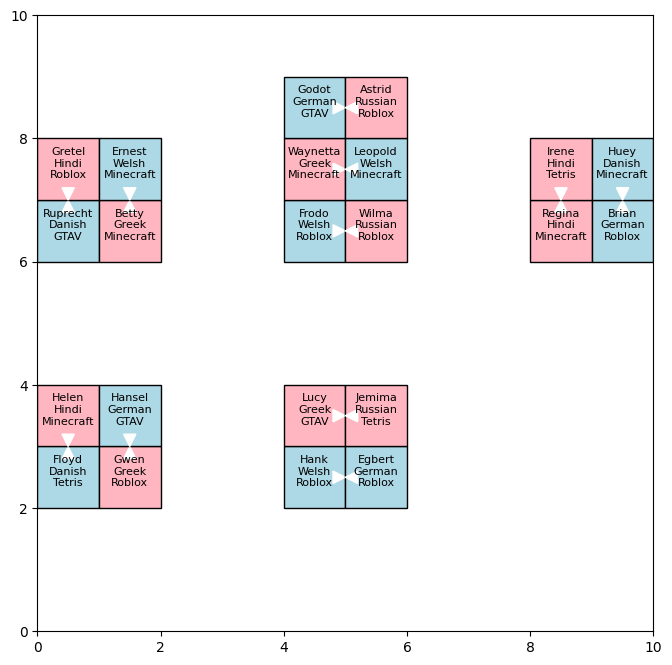

saving: solution as 25-04-2025_14:02:25_solution.svg


In [1]:
import pyseater as ps
params = ps.Parameters()
seater = ps.Pyseater(params.n_rows, params.n_cols)

ps.add_table(seater, 0, 2, ps.Table(2, 2, ps.Divide.HORIZONTAL))
ps.add_table(seater, 4, 2, ps.Table(2, 2, ps.Divide.VERTICAL))
ps.add_table(seater, 8, 6, ps.Table(2, 2, ps.Divide.HORIZONTAL))
ps.add_table(seater, 4, 6, ps.Table(2, 3, ps.Divide.VERTICAL))
ps.add_table(seater, 0, 6, ps.Table(2, 2, ps.Divide.HORIZONTAL))

seater.adj_rules.append(ps.Rule("gender", False))
seater.adj_rules.append(ps.Rule("language", False))
seater.adj_rules.append(ps.Rule("game", False))

# ops_rules.append(Rule("gender", False))
# ops_rules.append(Rule("language", False))
# ops_rules.append(Rule("game", False))

if(params.log_level > 0) : print("Applying rules:")
for adj_rule in seater.adj_rules :
    if(params.log_level > 0) : print("\tadjacent: " + str(adj_rule.attribute) + " = " + str(adj_rule.boolean))
for ops_rule in seater.ops_rules :
    if(params.log_level > 0) : print("\topposite:" + str(ops_rule.attribute) + " = " + str(ops_rule.boolean))

if params.seed :
    if(params.log_level > 0) : print("Seed will be set to " + str(params.seed))
    rng.seed(args.seed)

if params.target_fitness :
    if(params.log_level > 0) : print("Target fitness set to " + str(params.target_fitness) + "%")
params.target_fitness = (params.target_fitness / 100) * (seater.n_places * (len(seater.adj_rules) + len(seater.ops_rules)))

ps.draw_floorplan(seater, params)
ps.do_random_assignment(seater, params)
print("Random initial assignment")
ps.draw_floorplan(seater, params)
seater.solve(params)
fig = ps.draw_floorplan(seater, params)
ps.save_figure("solution", fig)